In [ ]:
pip install arviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import statsmodels.api as sm
import pystan as stan

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving beisball_salarios.csv to beisball_salarios.csv


In [ ]:
df = pd.read_csv("beisball_salarios.csv")

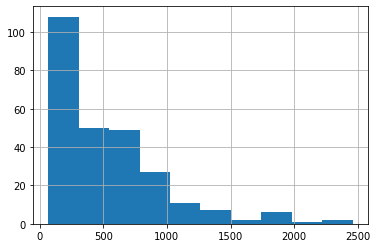

In [ ]:
df['Salary'].hist()

In [ ]:
sns.set()
np.random.seed(101)

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
    vector[N] z;
}
parameters {
    real alpha;
    real beta;
    real gamma;
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x + gamma * z, sigma);
}
"""

In [ ]:
x = df["AtBat"]
z = df["Hits"]
y = df["Salary"]

In [ ]:
data = {'N': len(x), 'x': x, 'z': z, 'y': y}

sm = stan.StanModel(model_code=model)

fit = sm.sampling(data=data, iter=1000, chains=4, warmup=500, thin=1, seed=101)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c3ce885ed72c30fc3a00aed058d5fc5e NOW.


In [ ]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,142.714,75.927,-10.780,278.019,2.272,1.674,1114.0,988.0,1.00
beta,-1.239,0.634,-2.440,-0.054,0.023,0.016,797.0,853.0,1.01
gamma,8.285,2.056,4.022,11.951,0.071,0.050,842.0,765.0,1.01
sigma,406.290,18.339,375.955,444.371,0.523,0.370,1234.0,1110.0,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff921bca350>,
      dtype=object)

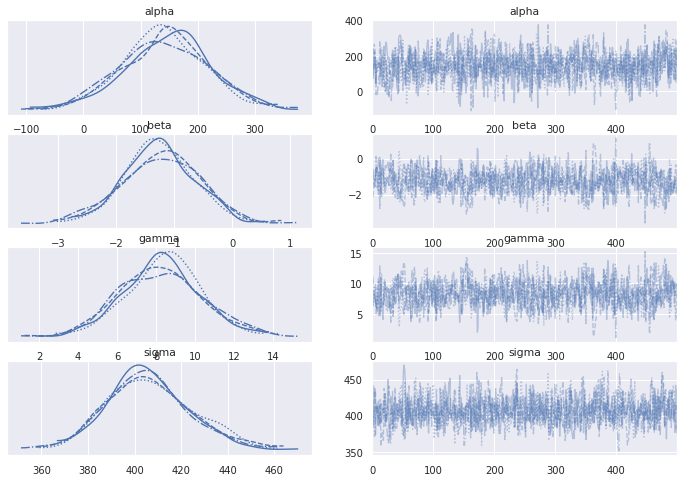

In [ ]:
az.plot_trace(fit)